In [4]:
import pandas as pd
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

In [9]:


# Read in the Gaia data
gaia_data = pd.read_csv('GaiaProjectData-result.csv', comment='#')

# Convert the Gaia data to a SkyCoord object
gaia_coords = SkyCoord(ra=gaia_data['ra']*u.deg, dec=gaia_data['dec']*u.deg)
gaia_data_simple = gaia_data[['designation', 'source_id', 'ra', 'dec']]

# Print first 5 rows of filtered data
print(f"RA constraint: ({np.min(gaia_data_simple['ra'])}, {np.max(gaia_data_simple['ra'])})")
print(f"DEC constraint: ({np.min(gaia_data_simple['dec'])}, {np.max(gaia_data_simple['dec'])})")
print(gaia_data_simple.columns)
display(gaia_data_simple)

RA constraint: (0.0160731952243443, 359.9810587298906)
DEC constraint: (-24.99329900797217, 81.99388443600814)
Index(['designation', 'source_id', 'ra', 'dec'], dtype='object')


designation            source_id          ra        dec
0     Gaia DR3 2263638568916884096  2263638568916884096  297.578736  71.364333
1     Gaia DR3 2265611402014032256  2265611402014032256  279.015141  70.467093
2     Gaia DR3 2270570062017774976  2270570062017774976  320.937316  69.534391
3     Gaia DR3 4126197144531483136  4126197144531483136  254.077642 -22.045429
4     Gaia DR3 4126229541458375808  4126229541458375808  253.659974 -21.879633
...                            ...                  ...         ...        ...
4213  Gaia DR3 3456132489144263552  3456132489144263552   88.252240  37.029563
4214  Gaia DR3 3454783083435919360  3454783083435919360   86.984649  35.159277
4215  Gaia DR3 4135303780877021312  4135303780877021312  260.282744 -16.641078
4216  Gaia DR3 4298219483910765824  4298219483910765824  297.572820   7.902401
4217  Gaia DR3 4124125282361429504  4124125282361429504  265.250185 -16.303499

[4218 rows x 4 columns]

In [10]:
from astropy.table import Table

# Convert the dataframe to an astropy table
t = Table.from_pandas(gaia_data_simple)
t.meta['comments'] = ['Cross match of Gaia DR3 with ZTF DR']

# Write the table to an IPAC table file
t.write('gaia_dataV1.ipac', format='ascii.ipac')


OSError: File gaia_dataV1.ipac already exists. If you mean to replace it then use the argument "overwrite=True".

Have run query on IRSA website, running filters on reuslts

In [11]:

# Read in results CSV
df = pd.read_csv('table_irsa_catalog_search_results.csv')

# Filter out nulls in 'oid' column
filtered_results = df[df['oid'].notnull()]
pd.set_option('display.max_rows', None)
filtered_results = filtered_results.reset_index()
# Filter for desired columns
simplified_results = filtered_results[['designation_01', 'source_id_01', 'ra_01', 'dec_01']]

# Rename columns
simplified_results.columns = ['designation', 'source_id', 'ra', 'dec']
display(filtered_results)
# Save as CSV
filtered_results.to_csv('filtered-results.csv', index=False)
# Save as IPAC table
t = Table.from_pandas(simplified_results)
t.meta['comments'] = ['non null matched results of Gaia DR3 with ZTF DRX Cross match']

# Write the table to an IPAC table file
t.write('gaia_data_matchesV4.ipac', format='ascii.ipac')


index  cntr_01    dist_x      pang_x                designation_01  \
0         0        1  4.449383   99.851852  Gaia DR3 2263638568916884096   
1         2        3  8.750706   60.576784  Gaia DR3 2270570062017774976   
2         3        4  4.677003  -77.703440  Gaia DR3 4126197144531483136   
3         4        5  6.601413   89.205214  Gaia DR3 4126229541458375808   
4         5        6  7.802655   66.186302  Gaia DR3 1837262184608359296   
5         6        7  3.945240  -75.685668  Gaia DR3 4471638920295089024   
6         8        9  8.733389   58.302236  Gaia DR3 4469859876126747392   
7         9       10  5.750559  -53.394306   Gaia DR3 461506747202125696   
8        11       12  7.345969  108.060171   Gaia DR3 462786406937073280   
9        12       13  6.759690   81.643010   Gaia DR3 461398960703453824   
10       14       15  6.331709  135.742174   Gaia DR3 461431705533750912   
11       15       16  8.287670 -131.162913   Gaia DR3 462485965385240832   
12       16       17  5.814632   56.799888   Gaia DR3 461471150513579904   
13       18       19  6.125524   91.591992   Gaia DR3 462212874184574720   
14       19       20  5.231724   86.150988  Gaia DR3 2012871852470504960   
15       20       21  4.760124  136.744969  Gaia DR3 2012880373685136896   
16       21       22  5.908401 -135.812597  Gaia DR3 2012483690499877888   
17       22       23  5.226660   82.008984  Gaia DR3 2012489630431063552   
18       23       24  6.070994  177.625549  Gaia DR3 2013043097102209280   
19       24       25  5.018086  101.673953  Gaia DR3 2012885871243217536   
20       26       27  6.864455   89.013155  Gaia DR3 2012889341577135872   
21       27       28  7.417940   42.074608  Gaia DR3 2013046537382879616   
22       28       29  9.213637  136.091545  Gaia DR3 2012896557122014080   
23       29       30  4.509163  -89.356236  Gaia DR3 2012912946718431232   
24       30       31  5.548337  -81.278509  Gaia DR3 2012918272480159616   
25       31       32  6.198720   28.532877  Gaia DR3 2012927309088937728   
26       32       33  8.819648  -37.872674  Gaia DR3 2012930332745761408   
27       33       34  8.482673  -41.721443  Gaia DR3 2012933420816045056   
28       34       35  6.468040  124.347741  Gaia DR3 2012943247697381632   
29       35       36  4.644578 -119.255204  Gaia DR3 2248544988686184064   
30       36       37  8.135785  114.948984  Gaia DR3 2012765337282245888   
31       37       38  5.669688 -115.160017  Gaia DR3 2012589140544752384   
32       38       39  4.375306   87.309803  Gaia DR3 2012591099047220608   
33       39       40  4.641863  137.436674  Gaia DR3 2013082855627928832   
34       40       41  7.090121   30.328902  Gaia DR3 2012771861325524992   
35       41       42  5.778260   91.297153  Gaia DR3 2012771865632485888   
36       42       43  5.970721  -28.435635  Gaia DR3 2012771968711694976   
37       43       44  4.969901   89.445391  Gaia DR3 2012772033124215808   
38       44       45  5.085336  -47.535913  Gaia DR3 2012774648771228416   
39       45       46  5.041499  137.973386  Gaia DR3 2012603021876275200   
40       46       47  6.106796 -128.417288  Gaia DR3 2012956205629816064   
41       47       48  6.566489    3.279142  Gaia DR3 2012958439012758912   
42       48       49  7.628593   47.441148  Gaia DR3 2012971323913160064   
43       49       50  5.644746   94.767095  Gaia DR3 2013112881729417344   
44       51       52  5.921115  162.382514  Gaia DR3 2013266955099705344   
45       52       53  4.893707  -94.564394  Gaia DR3 2013139308670676224   
46       53       54  6.333414 -127.009924  Gaia DR3 2012834984469785216   
47       54       55  5.858280   39.390983  Gaia DR3 2013006164689052416   
48       55       56  5.011792    1.659781  Gaia DR3 2012837527090883072   
49       56       57  6.938281   46.320144  Gaia DR3 2012854672600157184   
50       57       58  4.122735   97.029357  Gaia DR3 2013343817832699520   
51       58       59  8.161604  -53.743651  Gaia DR3 2

OSError: File gaia_data_matchesV4.ipac already exists. If you mean to replace it then use the argument "overwrite=True".

In [7]:
file_path = 'resultingLightCurves.fits'
with fits.open(file_path) as hdul:
    data = hdul[1].data
    table = Table(data)


names = [name for name in table.colnames if len(table[name].shape) <= 1]
lightCurve = table[names].to_pandas()

lightCurve.to_csv('lightCurveResults.csv', index=False)

unique_objects = lightCurve.drop_duplicates(subset=['oid'], keep='first')
targets = unique_objects[['oid', 'ra', 'dec']]
targets=targets.reset_index()
#display(targets)
print(len(targets))
targets.to_csv('listOfLBVCandidateTargets.csv',index=False)



1526


In [13]:
# Cross-match targets with filtered_results on the 'oid' column and add the 'designation_01' values
targets_with_designation = targets.merge(filtered_results[['oid', 'designation_01']], on='oid', how='left')

display(targets_with_designation)

targets_with_designation.to_csv('listOfLBVCandidateTargetswithGaiaDesignation.csv',index=False)


index               oid          ra        dec  \
0         0   256107200000916   81.043190 -24.489077   
1       164   257211100055283   89.711552 -23.005086   
2       167   258114200028944   98.137566 -21.021837   
3       176   259109100029245  107.756995 -22.530530   
4       278   259111300039147  103.312404 -24.113989   
5       279   259114300043726  104.915762 -21.604050   
6       282   259115400039701  104.314366 -22.202873   
7       288   259207100056881  103.930283 -24.678773   
8       290   259209100075230  108.453403 -22.904182   
9       293   259210400014686  106.596225 -23.607121   
10      824   259215100060162  104.231749 -21.099778   
11      828   260106100026237  113.447036 -24.480204   
12      948   260108100052665  109.593472 -24.853287   
13      951   260108100052675  109.404319 -24.816306   
14      954   260108100052693  109.704164 -24.948736   
15      955   260108100052694  109.806068 -24.955793   
16      958   260108200047497  108.933314 -24.566396   
17      960   260109200053665  114.420559 -22.633351   
18      961   260109300033228  114.525398 -23.914449   
19     1066   260109300052719  114.323648 -23.775399   
20     1074   260110400044693  113.509356 -23.538687   
21     1075   260111100038285  111.750714 -23.086038   
22     1093   260111100038301  111.931845 -22.859142   
23     1101   260111300040500  110.978090 -23.931975   
24     1102   260112100047905  109.423584 -23.183158   
25     1103   260112400047018  109.148956 -23.825238   
26     1155   260113100044798  115.115123 -21.028273   
27     1156   260113100044910  115.595737 -21.231626   
28     1160   260113300048444  114.715061 -21.500074   
29     1162   260113300048580  114.662102 -21.874328   
30     1163   260114200042996  112.356250 -21.006529   
31     1165   260114200043090  113.030730 -20.549795   
32     1166   260114200043092  112.965185 -20.930365   
33     1170   260114300004544  112.966681 -21.561800   
34     1295   260114300041955  112.368698 -21.858500   
35     1298   260114300041967  112.347246 -21.869206   
36     1302   260114400038461  113.621252 -21.698473   
37     1393   260114400047074  113.749585 -22.091981   
38     1396   260114400047117  113.924130 -21.482427   
39     1399   260115100050334  111.252815 -21.021820   
40     1400   260115100050501  111.256859 -21.157140   
41     1401   260115100050728  111.553783 -20.904565   
42     1442   260115200019483  110.224480 -21.166344   
43     1565   260115200049141  110.302484 -21.140636   
44     1566   260115300048681  110.775147 -21.695687   
45     1568   260115400048042  111.336072 -21.982425   
46     1576   260116100013353  109.514523 -21.035630   
47     1700   260116100047077  109.318403 -20.561690   
48     1701   260116400045576  109.913013 -21.830323   
49     1702   260205100085001  116.011993 -24.530811   
50     1704   260209400024542  115.724300 -23.691426   
51     1715   260210100045738  113.946201 -22.874920   
52     1732   260210100073307  113.647808 -22.838218   
53     1735   260211100068961  111.440634 -22.861928   
54     1736   260211200038963  110.237568 -22.486712   
55     1797   260212200006057  108.500572 -22.522473   
56     2796   260212300081164  108.673871 -23.491317   
57     2798   260212400042974  109.035983 -23.448145   
58     2825   260213300077844  114.763448 -21.843650   
59     2826   260213400077955  115.077757 -21.360175   
60     2828   260214200011303  112.436987 -20.740594   
61     3809   260214200067537  112.628730 -21.060200   
62     3874   260214400014357  113.773498 -21.650629   
63     4901   260214400079400  113.809362 -21.618728   
64     4902   260215100051829  111.273772 -21.013248   
65     4905   260215100068182  111.303546 -21.032365   
66     4917   260215200079320  110.217427 -21.343276   
67     4918   260215300077533  110.620080 -21.729638   
68     4950   261108200051359  116.288957 -24.652564   
69     4964   261110300049312  119.589871 -24.097193   
70     4965   261111300049071 

In [ ]:
lightCurve

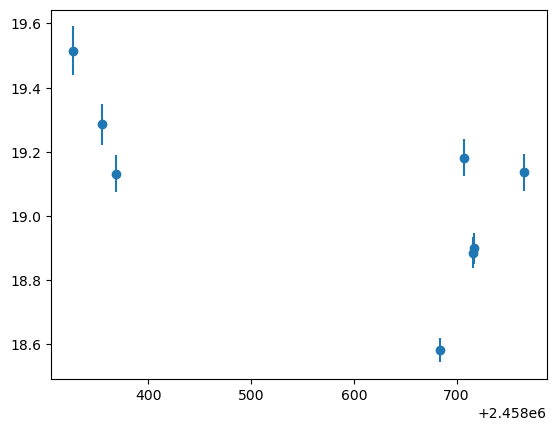

In [14]:
oid_arr = np.unique(lightCurve['oid']) #give me all oids
test_oid = oid_arr[1500] #Give me the first one

this_LC = lightCurve[lightCurve['oid'] == test_oid]
filters = np.unique(this_LC['filtercode'])
for filt in filters:
    this_filter = this_LC[this_LC['filtercode'] == filt]
    plt.errorbar(this_filter['hjd'], this_filter['mag'], yerr=this_filter['magerr'], fmt='o')

In [6]:
gaiaZTFMatches = pd.read_csv('constrained_gaia_ztf_list.csv')

# Filter lightCurve DataFrame based on oids present in gaiaZTFMatches
filteredLightCurves = lightCurve[lightCurve['oid'].isin(gaiaZTFMatches['oid'])]
print(len(gaiaZTFMatches))
print(len(filteredLightCurves))
min_oid_occurrences = 10
filteredLightCurves = filteredLightCurves.groupby('oid').filter(lambda x: len(x) >= min_oid_occurrences)
print(len(filteredLightCurves))

NameError: name 'lightCurve' is not defined

In [23]:
from astropy.time import Time
import matplotlib.dates as mdates

In [24]:
filteredLightCurves

oid      expid           hjd           mjd        mag  \
33433   479101100020060   45438785  2.458209e+06  58208.387859  14.529539   
33434   479101100020060   45440962  2.458209e+06  58208.409630  14.385886   
33435   479101100020060   48129761  2.458236e+06  58235.297616  14.579117   
33436   479101100020060   48329734  2.458238e+06  58237.297349  15.536552   
33437   479101100020060   49229370  2.458247e+06  58246.293704  15.459521   
33438   479101100020060   50133656  2.458256e+06  58255.336563  14.699763   
33439   479101100020060   50427351  2.458259e+06  58258.273518  14.958930   
33440   479101100020060   51321321  2.458268e+06  58267.213218  15.723414   
33441   479101100020060   51628990  2.458271e+06  58270.289907  15.095037   
33442   479101100020060   51925327  2.458274e+06  58273.253275  15.321535   
33443   479101100020060   52225509  2.458277e+06  58276.255093  15.356866   
33444   479101100020060   52529506  2.458280e+06  58279.295069  15.111983   
33445   479101100020060   53123093  2.458286e+06  58285.230937  15.416597   
33446   479101100020060   53421125  2.458289e+06  58288.211250  15.078082   
33447   479101100020060   54019157  2.458295e+06  58294.191574  15.395613   
33448   479101100020060   54325013  2.458298e+06  58297.250139  15.268893   
33449   479101100020060   55019230  2.458305e+06  58304.192303  15.324045   
33450   479101100020060   56116927  2.458316e+06  58315.169271  15.197202   
33451   479101100020060   58017606  2.458335e+06  58334.176065  15.057744   
33452   479101100020060   58317068  2.458338e+06  58337.170683  14.109247   
33453   479101100020060   59117826  2.458346e+06  58345.178264  14.974403   
33454   479101100020060   60915556  2.458364e+06  58363.155567  15.298897   
33455   479101100020060   73854480  2.458493e+06  58492.544803  15.197371   
33456   479101100020060   75353969  2.458508e+06  58507.539699  14.755454   
33457   479101100020060   75855581  2.458513e+06  58512.555810  15.337117   
33458   479101100020060   76852075  2.458523e+06  58522.520752  15.271455   
33459   479101100020060   78541614  2.458540e+06  58539.416146  15.304968   
33460   479101100020060   78950337  2.458544e+06  58543.503380  14.958817   
33461   479101100020060   79339498  2.458548e+06  58547.394988  15.435984   
33462   479101100020060   81837936  2.458573e+06  58572.379363  14.739387   
33463   479101100020060   82133432  2.458576e+06  58575.334329  15.107956   
33464   479101100020060   82837767  2.458583e+06  58582.377674  14.977324   
33465   479101100020060   83138609  2.458586e+06  58585.386099  15.319643   
33466   479101100020060   83431587  2.458589e+06  58588.315880  14.945807   
33467   479101100020060   83723048  2.458592e+06  58591.230486  15.394490   
33468   479101100020060   84027412  2.458595e+06  58594.274120  15.276060   
33469   479101100020060   84329666  2.458598e+06  58597.296667  15.004709   
33470   479101100020060   84450645  2.458599e+06  58598.506458  15.269218   
33471   479101100020060   84525364  2.458600e+06  58599.253646  15.025679   
33472   479101100020060   86225105  2.458617e+06  58616.251053  14.762012   
33473   479101100020060   86527041  2.458620e+06  58619.270417  15.341542   
33474   479101100020060   87925146  2.458634e+06  58633.251470  15.015937   
33475   479101100020060   88227400  2.458637e+06  58636.274005  14.572274   
33476   479101100020060   88523084  2.458640e+06  58639.230845  15.424012   
33477   479101100020060   88829750  2.458643e+06  58642.297500  15.254565   
33478   479101100020060   89123200  2.458646e+06  58645.232002  14.587393   
33479   479101100020060   89520687  2.458650e+06  58649.206875  15.439466   
33480   479101100020060   89817181  2.458653e+06  58652.171817  14.937523   
33481   479101100020060   90421086  2.458659e+06  58658.210868  15.248302   
33482   479101100020060   90721229  2.458662e+06  58661.212292  15.103458   
33483   479101100020060   91119107  2.458666e+06  58665.191076  15.146880   
33484   47910110

In [5]:
oid_arr2 = np.unique(filteredLightCurves['oid']) #give me all oids
 #Give me the first one
print(len(oid_arr2))

def plotLightCurves(ObjNum):
    plt.figure(figsize=(160, 68))  # Create a new figure with a 16:9 aspect ratio
    test_oid = oid_arr2[ObjNum]
    this_LC = filteredLightCurves[filteredLightCurves['oid'] == test_oid]
    filters = np.unique(this_LC['filtercode'])
    
    min_delMag_10days = []
    mean_delMag_10days = []
    max_delMag_10days = []
    
    for filt in filters:
        this_filter = this_LC[this_LC['filtercode'] == filt]

        # Convert MJD to date format
        mjd_dates = Time(this_filter['mjd'], format='mjd').datetime

        # Compute delMag and delTime values
        delMag = this_filter['mag'].diff()
        delTime = this_filter['mjd'].diff()  # MJD unit

        # Filter the data to include only delta mag values within 10 days
        delMag_10days = delMag[(delTime <= 10) & (delTime > 0)]
        
        # Calculate the min, mean, and max delta mag per 10 days
        min_delMag_10days.append(delMag_10days.min())
        mean_delMag_10days.append(delMag_10days.mean())
        max_delMag_10days.append(delMag_10days.max())

        # Plot the data points with error bars
        plt.errorbar(mjd_dates, this_filter['mag'], yerr=this_filter['magerr'], fmt='o-')

        # Add labels to each point
        for i, (date, mag, dmag, dtime) in enumerate(zip(mjd_dates, this_filter['mag'], delMag, delTime)):
            if i == 0:  # Skip the first point since there's no previous point for comparison
                continue
            label = f"({date.strftime('%Y-%m-%d')}, {mag:.2f}, {dmag:.2f}, {dtime:.2f})"
            plt.annotate(label, (date, mag), textcoords="offset points", xytext=(5, -15), fontsize=8)

    # Set x-axis labels to date format
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels for better readability

    # Set the title of the plot to the current oid
    plt.title(f"Object ID: {test_oid}")

    plt.show()  # Display the plot

    # Print the min, mean, and max delta mag per 10 days
    print(f"Object ID: {test_oid}")
    print(f"Min delta mag per 10 days: {min(min_delMag_10days)}")
    print(f"Mean delta mag per 10 days: {sum(mean_delMag_10days) / len(mean_delMag_10days)}")
    print(f"Max delta mag per 10 days: {max(max_delMag_10days)}")
    print()


for objNum in range(len(oid_arr2)):
    plotLightCurves(objNum)

NameError: name 'filteredLightCurves' is not defined

### Trying a more complex version that will also generate a CSV

In [ ]:
import pandas as pd
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

In [ ]:
file_path = 'resultingLightCurves.fits'
with fits.open(file_path) as hdul:
    data = hdul[1].data
    table = Table(data)


names = [name for name in table.colnames if len(table[name].shape) <= 1]
lightCurve = table[names].to_pandas()

lightCurve.to_csv('lightCurveResults.csv', index=False)

unique_objects = lightCurve.drop_duplicates(subset=['oid'], keep='first')
targets = unique_objects[['oid', 'ra', 'dec']]
targets=targets.reset_index()
#display(targets)
print(len(targets))
targets.to_csv('listOfLBVCandidateTargets.csv',index=False)



In [ ]:
# Cross-match targets with filtered_results on the 'oid' column and add the 'designation_01' values
targets_with_designation = targets.merge(filtered_results[['oid', 'designation_01']], on='oid', how='left')

display(targets_with_designation)

targets_with_designation.to_csv('listOfLBVCandidateTargetswithGaiaDesignation.csv',index=False)


In [ ]:
oid_arr = np.unique(lightCurve['oid']) #give me all oids
test_oid = oid_arr[1500] #Give me the first one

this_LC = lightCurve[lightCurve['oid'] == test_oid]
filters = np.unique(this_LC['filtercode'])
for filt in filters:
    this_filter = this_LC[this_LC['filtercode'] == filt]
    plt.errorbar(this_filter['hjd'], this_filter['mag'], yerr=this_filter['magerr'], fmt='o')

In [ ]:
gaiaZTFMatches = pd.read_csv('constrained_gaia_ztf_list.csv')

# Filter lightCurve DataFrame based on oids present in gaiaZTFMatches
filteredLightCurves = lightCurve[lightCurve['oid'].isin(gaiaZTFMatches['oid'])]
print(len(gaiaZTFMatches))
print(len(filteredLightCurves))
min_oid_occurrences = 10
filteredLightCurves = filteredLightCurves.groupby('oid').filter(lambda x: len(x) >= min_oid_occurrences)
print(len(filteredLightCurves))

In [1]:
import matplotlib.pyplot as plt
from astropy.time import Time
import matplotlib.dates as mdates
import pandas as pd
from astropy.time import Time
import matplotlib.dates as mdates

def calc_max_delMag_10days(oid):
    this_LC = filteredLightCurves[filteredLightCurves['oid'] == oid]
    filters = np.unique(this_LC['filtercode'])
    
    max_delMag_10days = []
    
    for filt in filters:
        this_filter = this_LC[this_LC['filtercode'] == filt]
        delMag = this_filter['mag'].diff()
        delTime = this_filter['mjd'].diff()  # MJD unit
        delMag_10days = delMag[(delTime <= 10) & (delTime > 0)]
        max_delMag_10days.append(delMag_10days.max())
    
    return max(max_delMag_10days)

oid_arr2_sorted = sorted(oid_arr2, key=calc_max_delMag_10days, reverse=True)

results_df = pd.DataFrame(columns=['oid', 'ra', 'dec', 'min_delMag_10days', 'mean_delMag_10days', 'max_delMag_10days'])

for objNum, test_oid in enumerate(oid_arr2_sorted):
    plt.figure(figsize=(64, 9))
    this_LC = filteredLightCurves[filteredLightCurves['oid'] == test_oid]
    filters = np.unique(this_LC['filtercode'])
    
    min_delMag_10days = []
    mean_delMag_10days = []
    max_delMag_10days = []
    
    for filt in filters:
        this_filter = this_LC[this_LC['filtercode'] == filt]

        # Convert MJD to date format
        mjd_dates = Time(this_filter['mjd'], format='mjd').datetime

        # Compute delMag and delTime values
        delMag = this_filter['mag'].diff()
        delTime = this_filter['mjd'].diff()  # MJD unit

        # Filter the data to include only delta mag values within 10 days
        delMag_10days = delMag[(delTime <= 10) & (delTime > 0)]
        
        # Calculate the min, mean, and max delta mag per 10 days
        min_delMag_10days.append(delMag_10days.min())
        mean_delMag_10days.append(delMag_10days.mean())
        max_delMag_10days.append(delMag_10days.max())

        # Plot the data points with error bars
        plt.errorbar(mjd_dates, this_filter['mag'], yerr=this_filter['magerr'], fmt='o-', label=filt)

        # Add labels to each point
        for i, (date, mag, dmag, dtime) in enumerate(zip(mjd_dates, this_filter['mag'], delMag, delTime)):
            if i == 0:  # Skip the first point since there's no previous point for comparison
                continue
            label = ""#f"({date.strftime('%Y-%m-%d')}, {mag:.2f}, {dmag:.2f}, {dtime:.2f})"
            plt.annotate(label, (date, mag), textcoords="offset points", xytext=(5, -15), fontsize=8)

    # Set x-axis labels to date format
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels for better readability

    # Set the title of the plot to the current oid
    plt.title(f"Light Curve for oid {test_oid}")

    # Add a legend to the plot
    plt.legend(title='Filter', loc='upper left')

    # Show the plot
    plt.show()

    # Print min, mean, and max delta mag per 10 days
    print(f"Object {test_oid}:")
    print(f"Minimum delta mag per 10 days: {min(min_delMag_10days):.2f}")
    print(f"Mean delta mag per 10 days: {sum(mean_delMag_10days)/len(mean_delMag_10days):.2f}")
    print(f"Maximum delta mag per 10 days: {max(max_delMag_10days):.2f}")
    print()

    # Add the oid and its statistics to the results dataframe
    ra = gaiaZTFMatches.loc[gaiaZTFMatches['oid'] == test_oid, 'ra_2'].values[0]
    dec = gaiaZTFMatches.loc[gaiaZTFMatches['oid'] == test_oid, 'dec_2'].values[0]
    results_df = results_df.append({
        'oid': test_oid,
        'ra': ra,
        'dec': dec,
        'min_delMag_10days': min(min_delMag_10days),
        'mean_delMag_10days': sum(mean_delMag_10days) / len(mean_delMag_10days),
        'max_delMag_10days': max(max_delMag_10days)
    }, ignore_index=True)

# Sort the results dataframe by max delta mag per 10 days
results_df.sort_values(by=['max_delMag_10days'], ascending=False, inplace=True)


NameError: name 'oid_arr2' is not defined

In [19]:
results_df=results_df.reset_index()
# Display the results dataframe
display(results_df)

index           oid          ra        dec  min_delMag_10days  \
0       1  6.382043e+14  281.892513  22.844862          -2.688492   
1       5  6.863034e+14  297.570559  30.019230          -1.106632   
2       6  6.882063e+14  314.881731  32.198060          -1.540590   
3       7  6.863033e+14  296.468037  30.264638          -1.969410   
4      11  7.293063e+14  304.749203  38.951422          -0.620008   
5       8  6.852014e+14  294.041293  29.819639          -1.429913   
6      12  7.293071e+14  303.605698  40.330825          -1.608077   
7      13  6.882134e+14  317.473396  35.491613           1.400974   
8      24  7.701124e+14  328.195454  48.022494          -1.208447   
9      29  1.805202e+15  324.947568  48.540622          -0.645994   
10     14  5.913074e+14  295.601746  17.523832          -0.818653   
11     15  4.791011e+14  229.649028   2.070531          -1.093593   
12     16  6.863133e+14  301.543720  35.386883          -1.073202   
13     25  7.302053e+14  316.146882  38.766632          -1.297813   
14     30  1.768210e+15  314.929120  45.801561           0.130774   
15     17  6.391092e+14  296.264977  27.643573          -1.104683   
16     31  1.587202e+15  298.799516  11.960999           0.958855   
17     18  5.922154e+14  302.418018  21.078681          -1.026045   
18     32  1.684108e+15  296.568790  28.271823          -0.912376   
19     33  4.901071e+14  301.657413   3.863563          -0.662302   
20     34  7.683063e+14  312.473831  46.661416          -0.968402   
21     35  1.728207e+15  303.629466  36.662467          -0.201139   
22     36  1.684203e+15  297.599757  27.465608          -1.280481   
23     19  5.932153e+14  309.624333  21.330742          -1.230713   
24     20  6.831054e+14  278.489150  31.640088          -1.280182   
25     37  8.013161e+14  308.643928  57.928068          -1.177493   
26     38  7.682053e+14  315.140643  46.244863          -0.574827   
27     39  1.684207e+15  297.536703  28.134684          -0.812317   
28     40  7.293031e+14  303.373148  38.480627          -0.233126   
29     41  7.681063e+14  312.934444  46.032108          -0.634562   
30     42  1.584104e+15  273.962846  12.095793          -0.387993   
31     43  1.684207e+15  298.119892  29.418773           0.401369   
32     44  7.682124e+14  308.110178  48.218448           0.236507   
33     45  1.682106e+15  285.327647  28.412128          -0.295750   
34     46  6.861071e+14  297.519045  32.640104          -0.176447   
35     47  4.791011e+14  229.605839   2.047825           0.306562   
36     48  5.901114e+14  288.330699  19.396818          -0.150787   
37     49  1.730211e+15  320.057436  37.847056           0.027586   
38     21  5.422022e+14  306.760761   9.092025          -0.082485   
39     50  1.637108e+15  299.132716  21.740260          -0.102524   
40     51  4.362074e+14  283.489973  -3.812454          -0.410616   
41     52  7.681053e+14  315.971376  46.332374          -0.452032   
42      0  5.411042e+14  295.660302   9.227535                NaN   
43      2  6.851013e+14  293.350720  29.962113                NaN   
44      3  6.861094e+14  302.301374  33.919837                NaN   
45      4  6.862133e+14  300.875479  36.024365                NaN   
46      9  6.882112e+14  312.068250  34.458759                NaN   
47     10  7.292033e+14  302.324149  37.502257                NaN   
48     22  7.651103e+14  283.116867  48.403671                NaN   
49     23  7.691023e+14  322.315126  44.337973                NaN   
50     26  1.584204e+15  274.469390  11.877631                NaN   
51     27  1.587216e+15  295.432489  18.320372                NaN   
52     28  1.682113e+15  287.272335  33.239714                NaN   

    mean_delMag_10days  max_delMag_10days  
0             0.015562           2.548622  
1             0.175300           2.261627  
2             0.011345           1.898880  
3             0.168740           1.850932  
4             0.699577           1.824432  
5            

### the section where I try even more bat shit ideas

In [ ]:
import matplotlib.pyplot as plt
from astropy.time import Time
import matplotlib.dates as mdates
import pandas as pd

def calc_max_delMag_10days(oid):
    this_LC = filteredLightCurves[filteredLightCurves['oid'] == oid]
    filters = np.unique(this_LC['filtercode'])
    
    all_delMag_rates = []

    for filt in filters:
        this_filter = this_LC[this_LC['filtercode'] == filt]

        for i in range(len(this_filter)-1):
            for j in range(i+1, len(this_filter)):
                delMag = this_filter['mag'].iloc[j] - this_filter['mag'].iloc[i]
                delTime = this_filter['mjd'].iloc[j] - this_filter['mjd'].iloc[i]
                delMag_rate = delMag / delTime * 10
                all_delMag_rates.append(delMag_rate)

    return max(all_delMag_rates, key=abs)

oid_arr2_sorted = sorted(oid_arr2, key=calc_max_delMag_10days, reverse=True)

results_df = pd.DataFrame(columns=['oid', 'ra', 'dec', 'num_points', 'min_delMag_10days', 'mean_delMag_10days', 'max_delMag_10days', 'min_delTime', 'mean_delTime', 'max_delTime'])

for objNum, test_oid in enumerate(oid_arr2_sorted):
    plt.figure(figsize=(16, 9))
    this_LC = filteredLightCurves[filteredLightCurves['oid'] == test_oid]
    filters = np.unique(this_LC['filtercode'])
    
    all_delMag_rates = []
    all_delTimes = []
    
    for filt in filters:
        this_filter = this_LC[this_LC['filtercode'] == filt]

        # Convert MJD to date format
        mjd_dates = Time(this_filter['mjd'], format='mjd').datetime

        for i in range(len(this_filter)-1):
            for j in range(i+1, len(this_filter)):
                delMag = this_filter['mag'].iloc[j] - this_filter['mag'].iloc[i]
                delTime = this_filter['mjd'].iloc[j] - this_filter['mjd'].iloc[i]
                delMag_rate = delMag / delTime * 10
                all_delMag_rates.append(delMag_rate)
                all_delTimes.append(delTime)

        # Plot the data points with error bars
        plt.errorbar(mjd_dates, this_filter['mag'], yerr=this_filter['magerr'], fmt='o', label=filt)

        # Add labels to each point
        for i, (date, mag, dmag, dtime) in enumerate(zip(mjd_dates, this_filter['mag'], delMag, delTime)):
            if i == 0:  # Skip the first point since there's no previous point for comparison
                continue
            label = f"({date.strftime('%Y-%m-%d')}, {mag:.2f}, {dmag:.2f}, {dtime:.2f})"
            plt.annotate(label, (date, mag), textcoords="offset points", xytext=(5, -15), fontsize=8)

    # Set x-axis labels to date format

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels for better readability

    # Set the title of the plot to the current oid
    plt.title(f"Light Curve for oid {test_oid}")

    # Add a legend to the plot
    plt.legend(title='Filter', loc='upper left')

    # Show the plot
    plt.show()

    # Print min, mean, and max delta mag per 10 days
    print(f"Object {test_oid}:")
    print(f"Minimum delta mag per 10 days: {min(all_delMag_rates):.2f}")
    print(f"Mean delta mag per 10 days: {sum(all_delMag_rates) / len(all_delMag_rates):.2f}")
    print(f"Maximum delta mag per 10 days: {max(all_delMag_rates):.2f}")
    print()

    # Add the oid and its statistics to the results dataframe
    ra = gaiaZTFMatches.loc[gaiaZTFMatches['oid'] == test_oid, 'ra_2'].values[0]
    dec = gaiaZTFMatches.loc[gaiaZTFMatches['oid'] == test_oid, 'dec_2'].values[0]
    results_df = results_df.append({
        'oid': test_oid,
        'ra': ra,
        'dec': dec,
        'num_points': len(this_LC),
        'min_delMag_10days': min(all_delMag_rates),
        'mean_delMag_10days': sum(all_delMag_rates) / len(all_delMag_rates),
        'max_delMag_10days': max(all_delMag_rates),
        'min_delTime': min(all_delTimes),
        'mean_delTime': sum(all_delTimes) / len(all_delTimes),
        'max_delTime': max(all_delTimes)
    }, ignore_index=True)

# Sort the results dataframe by max delta mag per 10 days
results_df.sort_values(by=['max_delMag_10days'], ascending=False, inplace=True)




In [ ]:
# Display the results dataframe
display(results_df)


# Hot Garbage i may try to fix later below this point

In [ ]:

# Function to calculate the maximum magnitude shift rate and average delta mag for a single object
def max_mag_shift_rate_and_avg_delta_mag(object_data):
    object_data = object_data.sort_values(by='hjd')
    object_data['delta_hjd'] = object_data['hjd'].diff().fillna(0)
    object_data['delta_mag'] = object_data['mag'].diff().fillna(0)
    object_data['mag_shift_rate'] = abs(object_data['delta_mag'] / object_data['delta_hjd'])

    max_shift_rate = object_data['mag_shift_rate'].max()
    avg_delta_mag = object_data['delta_mag'].abs().mean()

    return max_shift_rate, avg_delta_mag

unique_object_ids = np.unique(filteredLightCurves['oid'])
object_metrics = {}

for oid in unique_object_ids:
    object_data = filteredLightCurves[filteredLightCurves['oid'] == oid]
    max_shift_rate, avg_delta_mag = max_mag_shift_rate_and_avg_delta_mag(object_data)
    object_metrics[oid] = {'max_shift_rate': max_shift_rate, 'avg_delta_mag': avg_delta_mag}

# Sort objects by their maximum magnitude shift rate and pick the top 20
sorted_objects = sorted(object_metrics.items(), key=lambda x: x[1]['max_shift_rate'], reverse=True)[:20]

print("Top 20 objects with the most drastic shift in magnitude in the least amount of time:")
for oid, metrics in sorted_objects:
    max_shift_rate = metrics['max_shift_rate']
    avg_delta_mag = metrics['avg_delta_mag']
    print(f"Object ID: {oid}, Max Magnitude Shift Rate: {max_shift_rate}, Average Delta Mag: {avg_delta_mag}")


In [ ]:
# Define a function to plot light curves for a given object ID
def plot_light_curves(table, object_id):
    filters = set(table['filter'])
    object_table = table[table['oid'] == object_id]

    for filter_id in filters:
        filter_table = object_table[object_table['filter'] == filter_id]
        mjd = filter_table['mjd']
        mag = filter_table['mag']
        magerr = filter_table['magerr']
        plt.errorbar(mjd, mag, yerr=magerr, marker='o', linestyle='-', label=f'Filter {filter_id}')

    plt.gca().invert_yaxis()
    plt.xlabel('MJD')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.title(f'Light Curve for Object {object_id}')
    plt.show()


unique_object_ids = np.unique(table['oid'])

for object_id in unique_object_ids:
    plot_light_curves(table, object_id)
